## OCR
 - easyocr
 - tesseract
 - [SceneExplainAPI](https://jina.ai/news/scenexplains-ocr-beats-gpt-4v-hands-down-chinese-japanese-korean-arabic-hindi-and-more/)
 - [surya: better than tesseract](https://github.com/VikParuchuri/surya)

### easyocr
[easyocr on github](https://github.com/JaidedAI/EasyOCR#api-documentation)<br>
The easyocr-Algorithm dates from [2015](https://arxiv.org/pdf/1507.05717.pdf). Considered, that we use neural networks, this is rather 'old'. However, for a first check, to see if the whole pipeline could work with OCR it's good enough. Perhaps it will turn out that it's even not the processing step in the pipeline that has to be improved upon the most.<br>
The model consists of several steps:<br>
1. a convolutional layer extracting feature maps (VGG is one of the most often used networks for this task)
2. the vectors (columns) representing the different positions in the input image are fed to a Recurrent Neural Network (RNN) (LSTM). This RNN predicts the most probable sequence of characters (and blanks) over the input feature maps.
3. The Transcription Layer uses a 'dictionary approach' to clean the previous predictions and to return entire words.

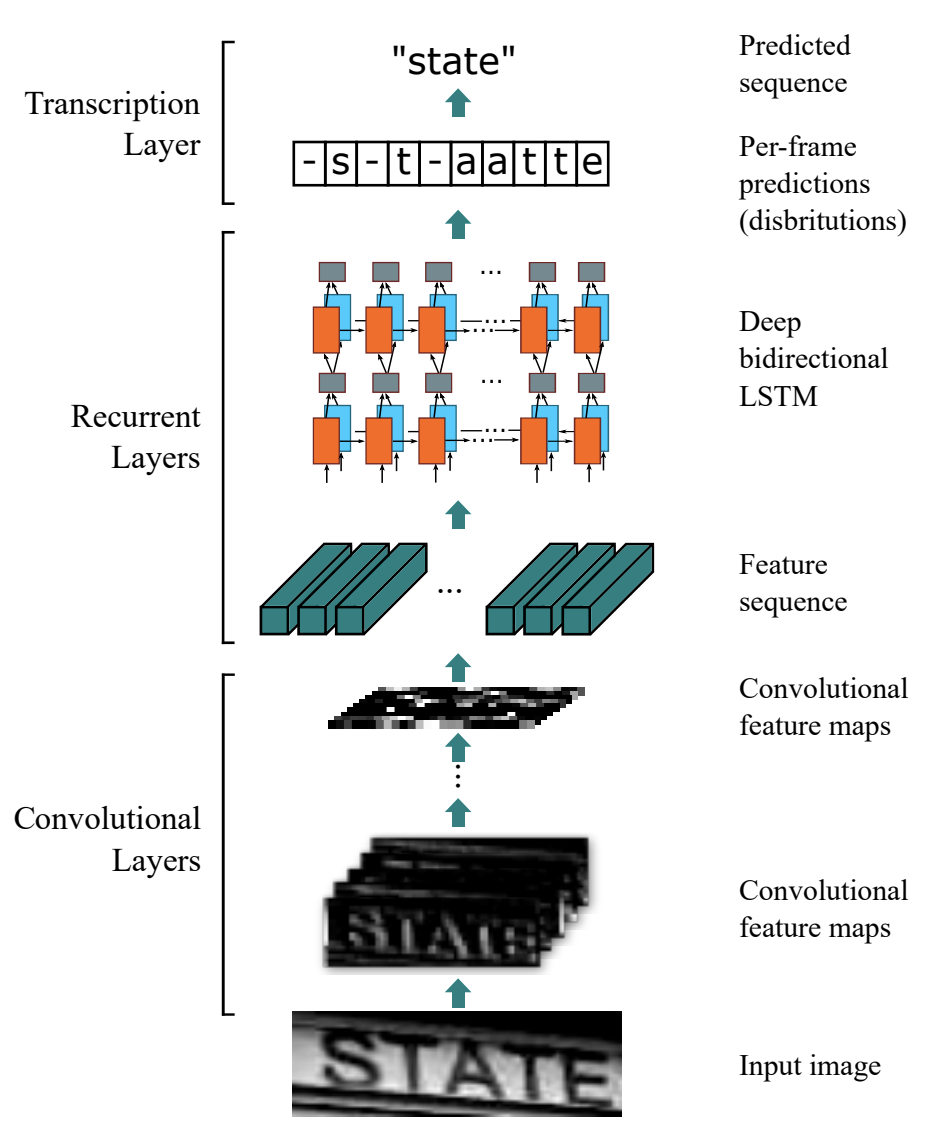

In [11]:
from IPython.display import Image
Image('../images/easyocr1.png')

### tesseract
Tesseract is around for more than 15 years. It is open-source and used in most non-commercial software with OCR-capabilities. In [2016](https://github.com/tesseract-ocr/docs/blob/main/das_tutorial2016/6ModernizationEfforts.pdf) a LSTM was added to its processing pipeline.<br>
Good explanations and instructions (also for installing) can be found [here](https://nanonets.com/blog/ocr-with-tesseract/).

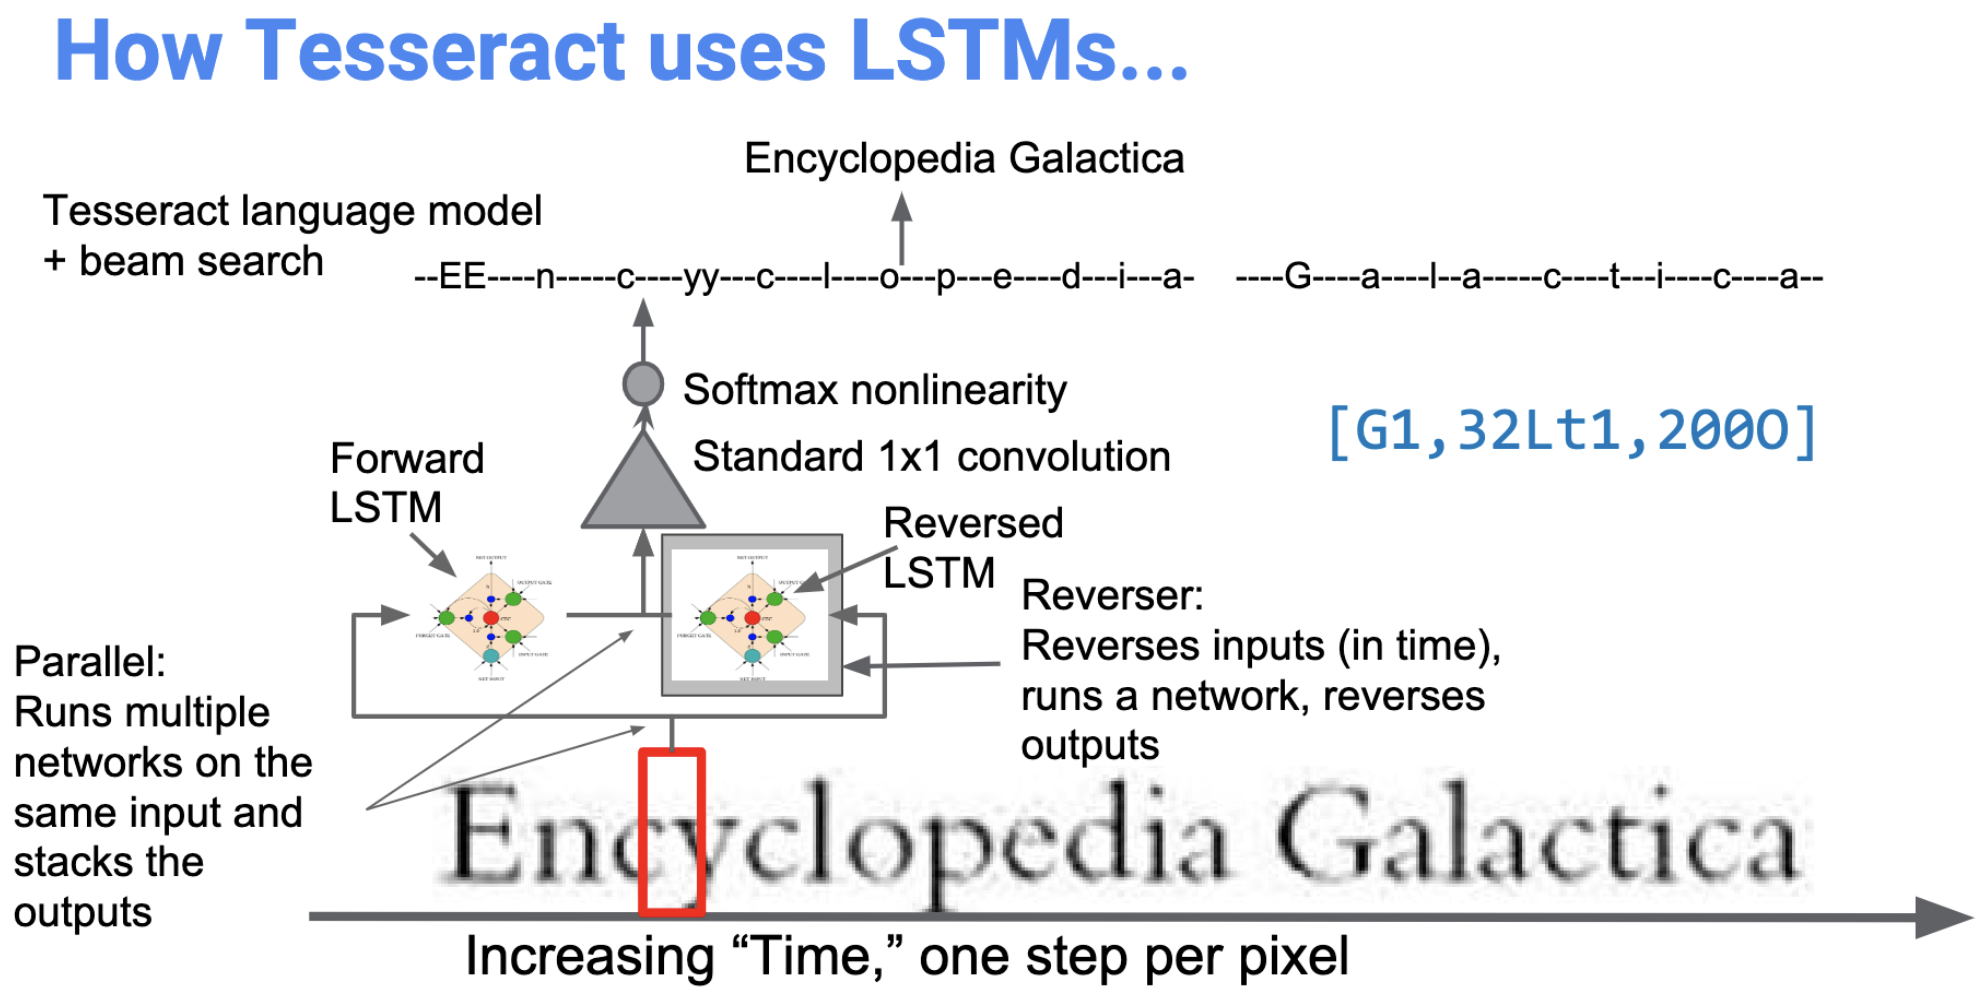

In [12]:
    Image('../images/tessearct1.png')

data is taken form [here](https://www.kaggle.com/datasets/volkandl/optical-character-recognition-ocr-texts)

In [13]:
!pip install opencv-python

In [14]:
!pip install pytesseract

In [15]:
import cv2
import pytesseract
import os
from random import sample
import easyocr
from IPython.display import Image

path = '/home/martin/python/fhnw_lecture/data/OCR_TEXT'
reader = easyocr.Reader(['de', 'it', 'fr', 'en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [16]:
all_pics = os.listdir(path)
imgs = sample(all_pics, 20)


For an explanation of the tesseract configuration possibilities, please have a look [here](https://learnopencv.com/deep-learning-based-text-recognition-ocr-using-tesseract-and-opencv/)

get the correct eng.traineddata version as described here:
https://stackoverflow.com/questions/14800730/tesseract-running-error

do this:
/usr/share/tesseract-ocr/4.00/tessdata# wget https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata

'219\na3!\nR19 xb 630\n{| Zase je [2 a.0218] gron7 (2) YS\nA S 16, 2 16, ri |\n3 Ls fH eee Ll +s _t s 6 (B)—\n8 ab : Ye\nWZ =\n[8] Rt 7 A c\nS @\n| nis nese |_| rw saves\n1452 LI (4:1)\ngrat i 76 2, E 0,4x0,2 DIN 509\n2\n76+ 0,1 y\n15°\nR04\nA-A(1:1)\n- 5 General tolerance DIN ISO 2768 -medum\n= Z 7) 3a Qeburr and break sharp edges 0 1..0 3mm 2 x2 wit\n! Ba aches dad dents are not acceotahle\n/ ——~ (f= | [Free rar\nLy 4\nH u a.sees* PO\n0.5445° [Toate Tiniraaie |\n= i 12 [ra xometry_lathe_\n7\nor) sample_v2.0 (1)\nzl] a\n| svete |\ntC tJ Stainless Steel\neee\n\x0c'

['21,9',
 'RO,3',
 'R19',
 'X4',
 '0,015',
 '8',
 '0,02/B',
 'R?',
 '0,02B',
 '010 H7',
 '4',
 '1',
 '8',
 '8',
 '2 PLACES',
 'R19',
 'RO,3',
 'THIS VIEW',
 '1x45',
 "Ix4s'",
 'C( 4 : 1 )',
 '8+0,1',
 '401',
 'E0,4x0,2 DIN 509',
 '21,9',
 '76+01',
 'RO,4',
 'A-A ( 1:1 )',
 'Generol toleronce DIN ISO 2768 ~medium',
 'Deburr and break sharp edges 0,1.0,3mm',
 '32/',
 'Scrotches ond_dents ore nnt occentahle',
 'Gewicht',
 'Forma',
 'A3',
 '0,5x45"',
 '0,5x45',
 'Date',
 'Initiale',
 'Uray',
 'xometry_lathe',
 'heck',
 'sample',
 'v2.0 (1)',
 'Haferial',
 '2:1',
 'Stainless Steel',
 '03+0 ,']

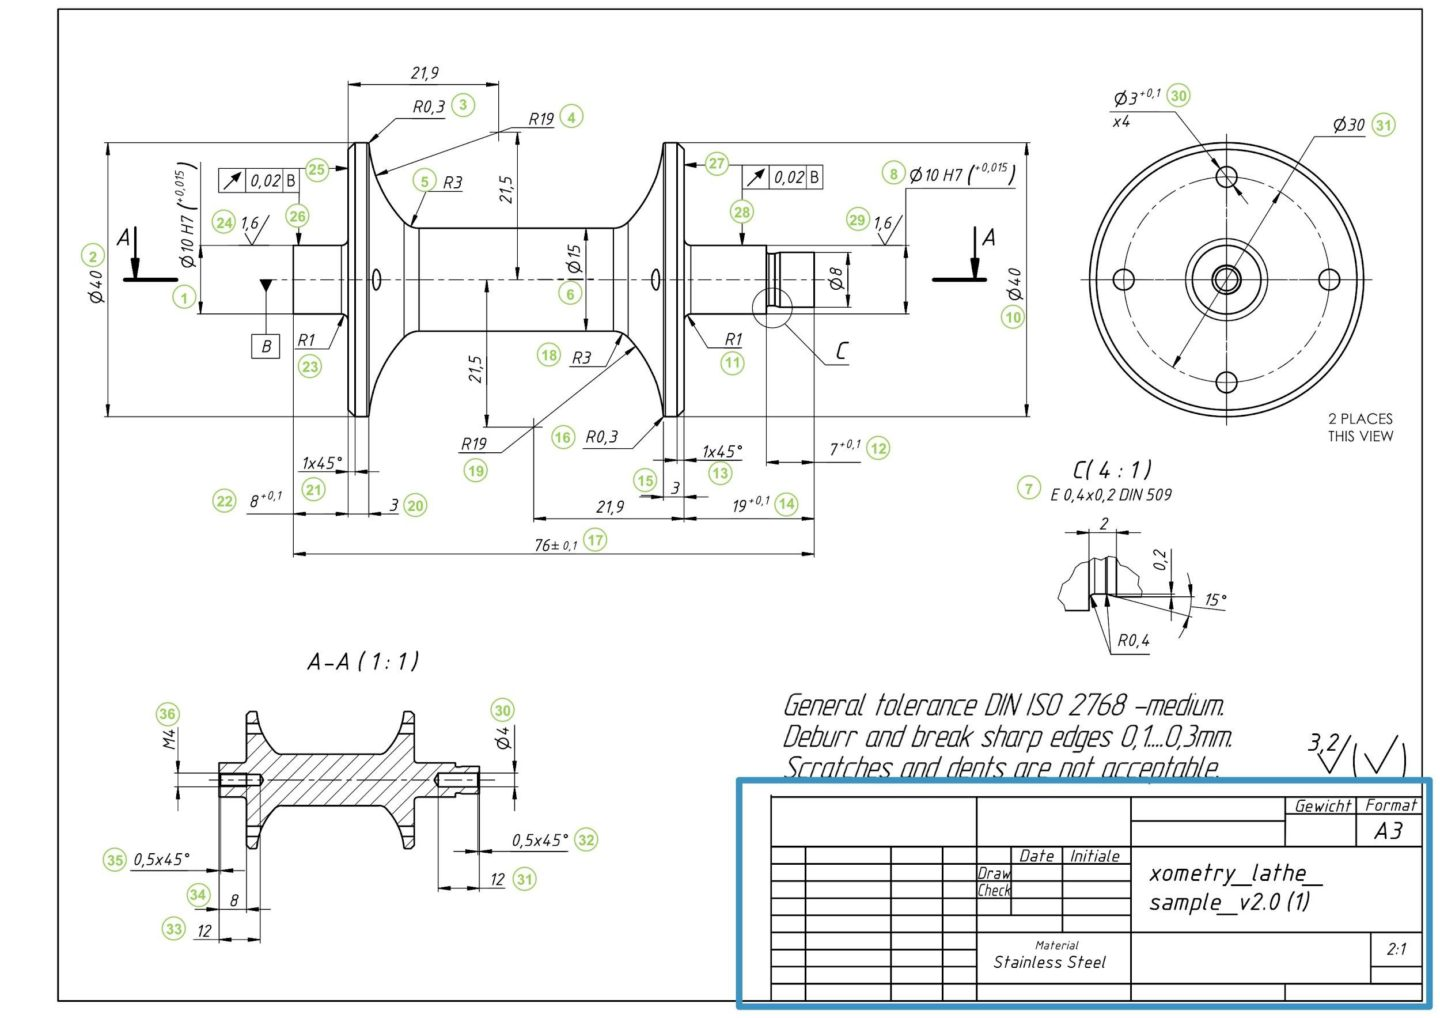

In [19]:
custom_config = r'--oem 3 --psm 6'

j = 6
img_path = os.path.join(path,imgs[j])
img = cv2.imread(img_path, 0)
display(pytesseract.image_to_string(img, config=custom_config))

display(reader.readtext(img, detail=0))

Image(img_path)